In [10]:
from matplotlib import pyplot as plt
import numpy as np

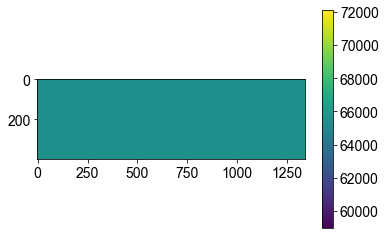

In [123]:
folder = r'C:\Users\grl31\OneDrive - University Of Cambridge\Cambridge\PhD\CS optics\Noise data\2021-05-04 Noise tests\\'
#file = r'EMCCD-0-01_  01.tif'
file = r'EMCCD-10-0_  01.tif'
fpath = folder + file
fpath = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\PIXIS test  3.tif'
im = plt.imread(fpath)
plt.imshow(im)
plt.colorbar()

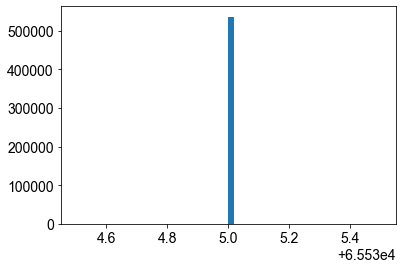

5.833073801542636

In [124]:
s = np.shape(im)
imflat = np.reshape(im,(s[0]*s[1]))
plt.hist(imflat,bins=50)
plt.show()
calculate_bit_depth(fpath,thresh=0.1)

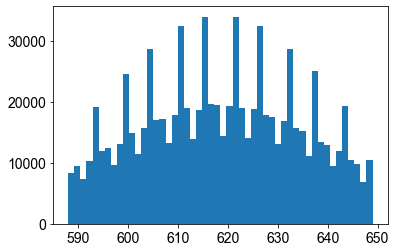

5.833073801542636

In [106]:
im_ord = np.sort(imflat)
i_10pc = int(s[0]*s[1]*0.1)
im_thresh = im_ord[i_10pc:-i_10pc]
plt.hist(im_thresh,bins=50)
plt.show()
calculate_bit_depth(imflat,thresh=0.1)

In [107]:
mean = np.mean(imflat)
rnge = np.max(imflat) - np.min(imflat)
ebd = np.log2((2**12-mean)/rnge)
ebd

2.1127532575894548

In [141]:
def calculate_bit_depth(fpath,thresh=True,bit=16):
    im = plt.imread(folder + file)
    s = np.shape(im)
    imflat = np.reshape(im,(s[0]*s[1]))
    if thresh != 0:
        im_ord = np.sort(imflat)
        i_10pc = int(s[0]*s[1]*thresh)
        im_thresh = im_ord[i_10pc:-i_10pc]
        imflat = im_thresh
    mean = np.mean(imflat)
    rnge = np.max(imflat) - np.min(imflat)
    ebd = np.log2((2**bit-mean)/rnge)
    return ebd

In [142]:
folder = r'C:\Users\grl31\OneDrive - University Of Cambridge\Cambridge\PhD\CS optics\Noise data\2021-05-04 Noise tests\\'
file = r'EMCCD-0-01_  01.tif'
ebds = np.zeros((3,4,10))
for i, c in enumerate(['EMCCD','PIXIS','PIXIS2']):
    if c == 'PIXIS2':
        folder = r'C:\Users\grl31\Dropbox (Cambridge University)\INT CS\Noise tests\\'
    for j, e in enumerate(['0-01','0-1','1-0','10-0']):
        for k, n in enumerate(['01','02','03','04','05','06','07','08','09','10']):
            file = r'%s-%s_  %s.tif' % (c,e,n)
            fpath = folder + file

            ebd = calculate_bit_depth(fpath,thresh=.1)
            ebds[i,j,k] = ebd
        

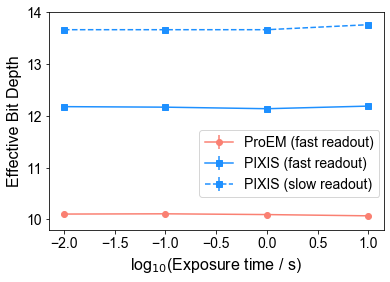

In [166]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Arial'})

xs = [0.01,0.1,1,10]
ys = []
errs = []
for i in range(4):
    y = np.mean(ebds[0,i,:])
    err = np.std(ebds[0,i,:])/10**.5
    ys.append(y)
    errs.append(err)

plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='o-',label='ProEM (fast readout)',color='salmon')

ys = []
errs = []
for i in range(4):
    y = np.mean(ebds[1,i,:])
    err = np.std(ebds[1,i,:])/10**.5
    ys.append(y)
    errs.append(err)

plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s-',label='PIXIS (fast readout)',color='dodgerblue')

ys = []
errs = []
for i in range(4):
    y = np.mean(ebds[2,i,:])
    err = np.std(ebds[2,i,:])/10**.5
    ys.append(y)
    errs.append(err)

plt.errorbar(np.log10(xs),ys,yerr=errs,fmt='s--',label='PIXIS (slow readout)',color='dodgerblue')

#plt.title('10% upper and lower threshold',fontsize = 16)
plt.ylabel('Effective Bit Depth',fontsize=16)
plt.xlabel('log$_{10}$(Exposure time / s)',fontsize=16)
plt.ylim([9.8,14])
plt.legend(loc=(.45,0.15))